In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #split the data

#trian
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# give results 
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [349]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1)Explorty Data Analysis

# Explore Data 

In [352]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [353]:
df.shape

(768, 9)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [355]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [356]:
df.duplicated().sum()

0

# Analysis

In [358]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

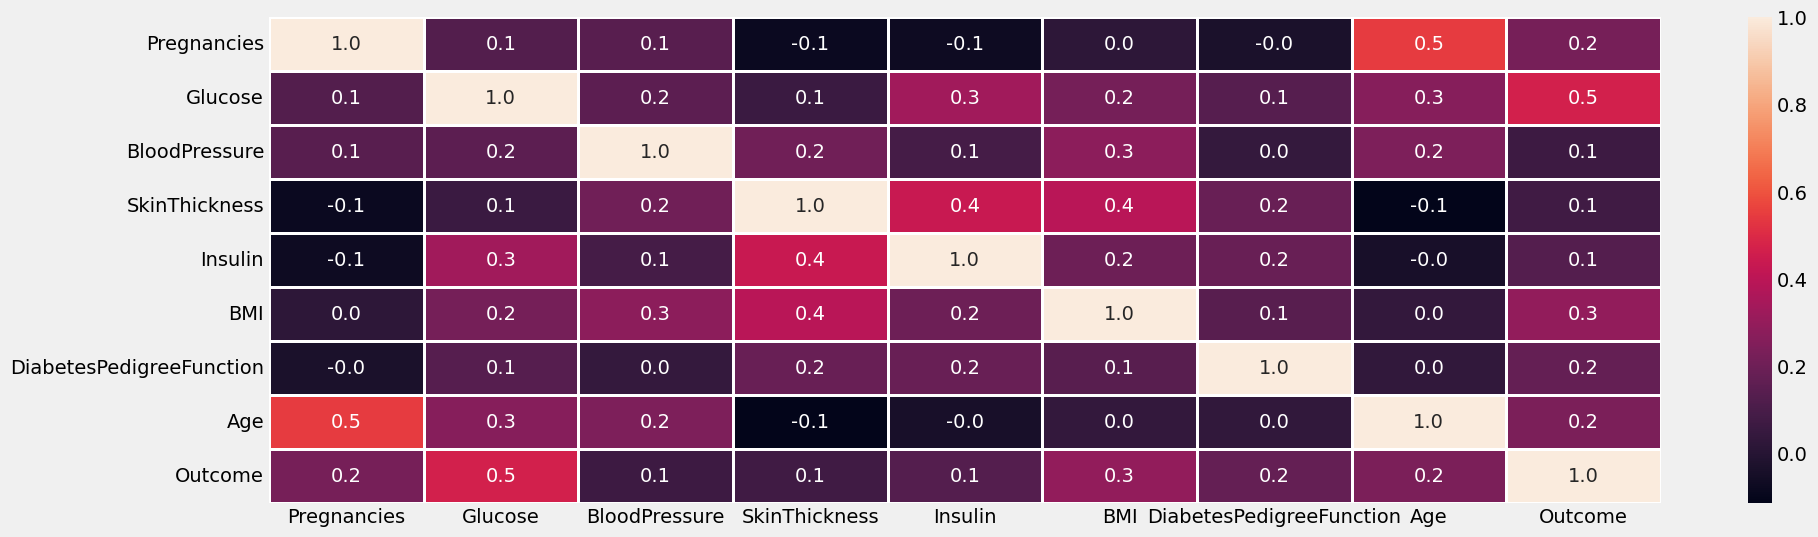

In [359]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,fmt='0.1f',linewidths=0.8)

<Axes: xlabel='Outcome', ylabel='count'>

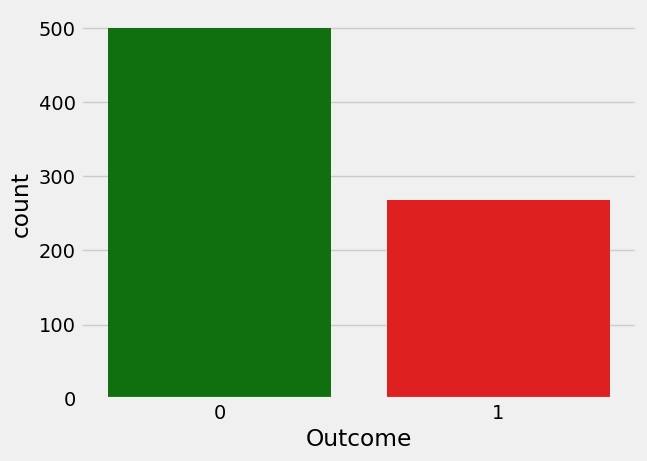

In [360]:
sns.countplot(x="Outcome",data=df,palette=["g","r"])

In [361]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

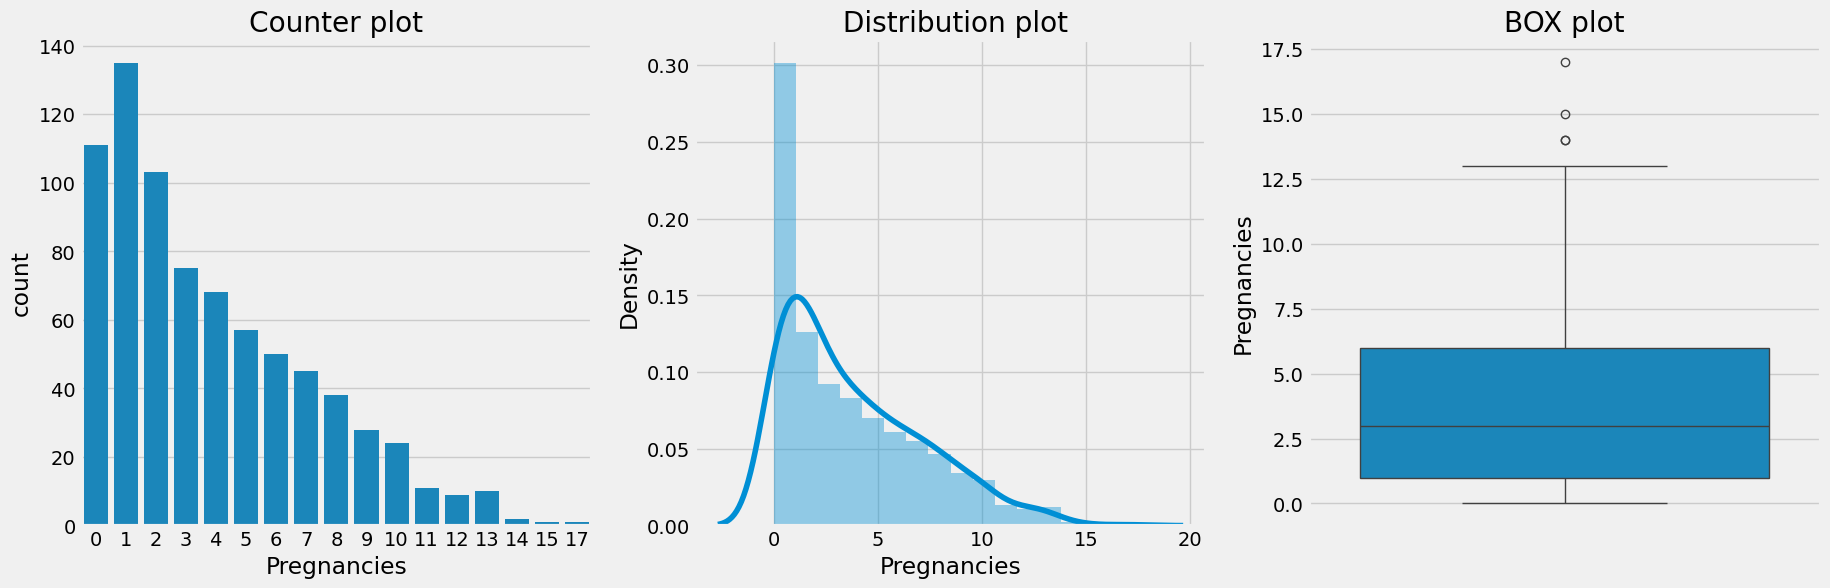

In [362]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter plot")
sns.countplot(x="Pregnancies",data=df)

plt.subplot(1,3,2)
plt.title(" Distribution plot")
sns.distplot(df["Pregnancies"])

plt.subplot(1,3,3)
plt.title("BOX plot")
sns.boxplot(y=df["Pregnancies"])

plt.show()

<Axes: ylabel='Age'>

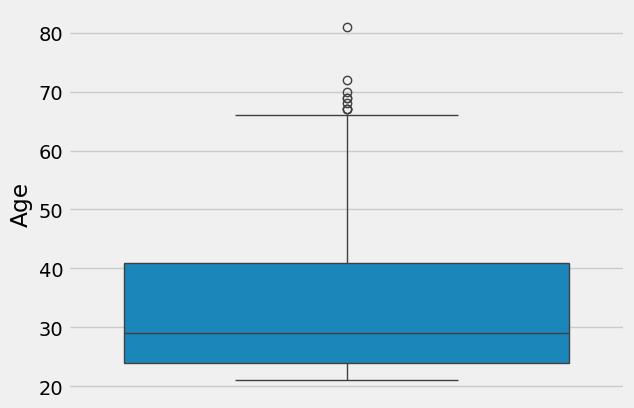

In [363]:
sns.boxplot(df["Age"])

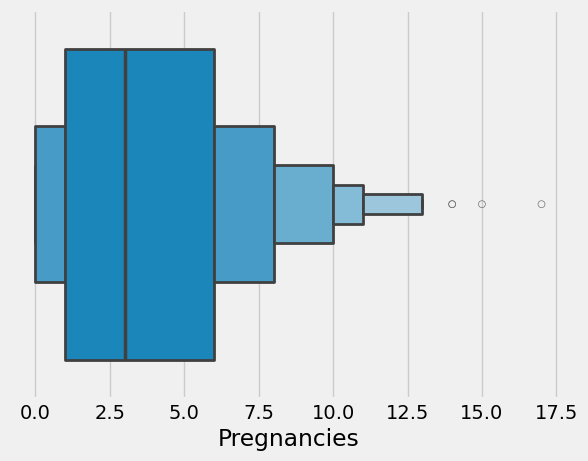

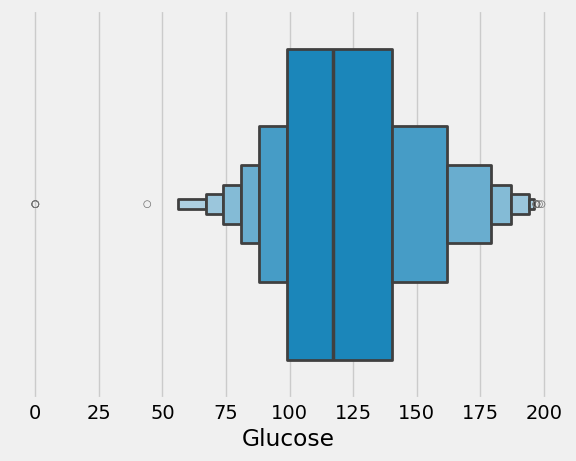

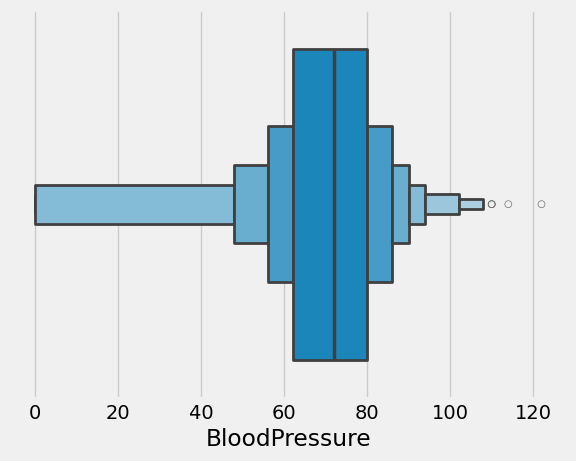

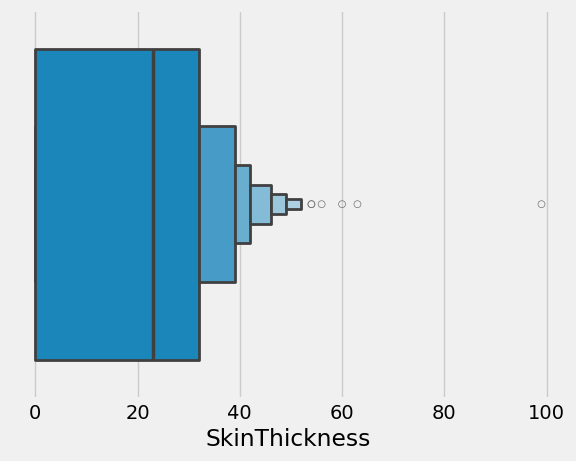

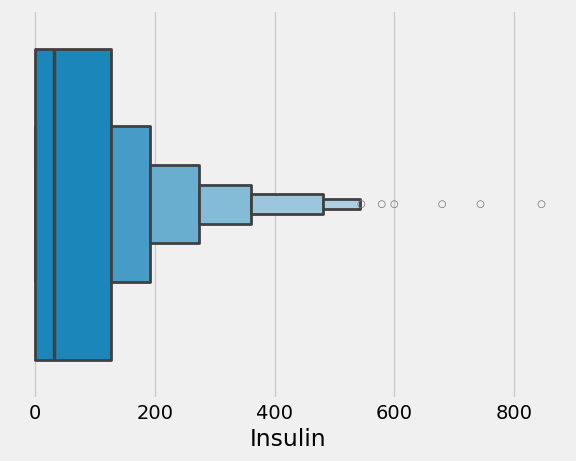

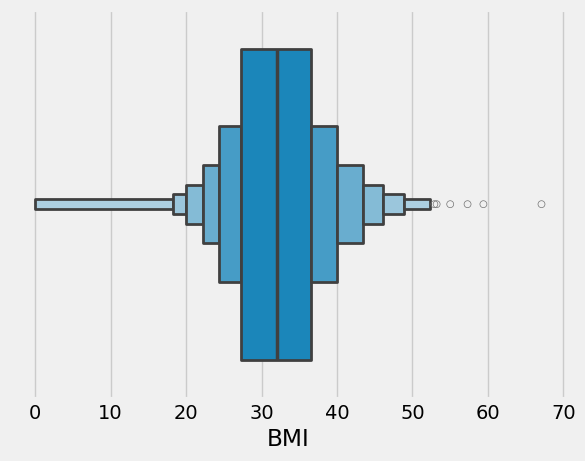

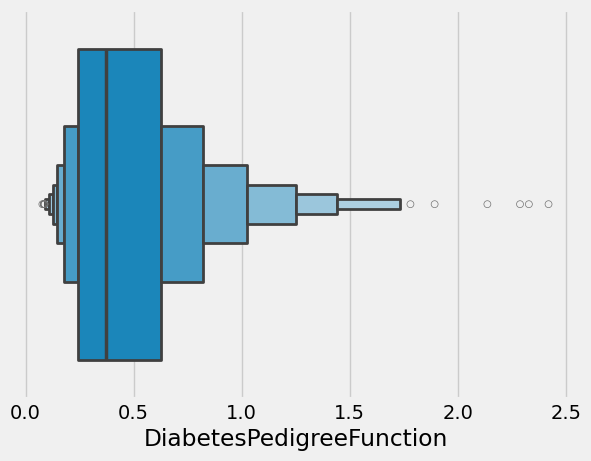

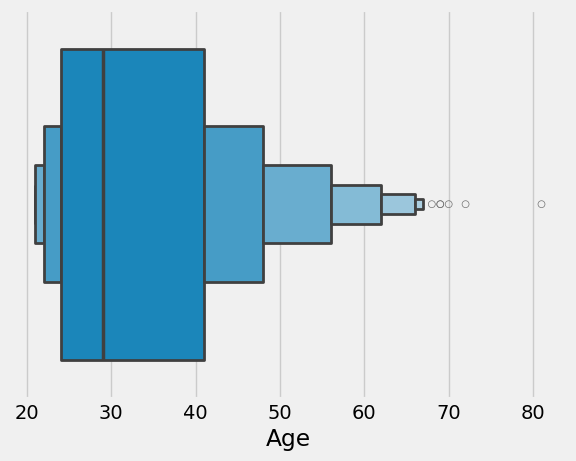

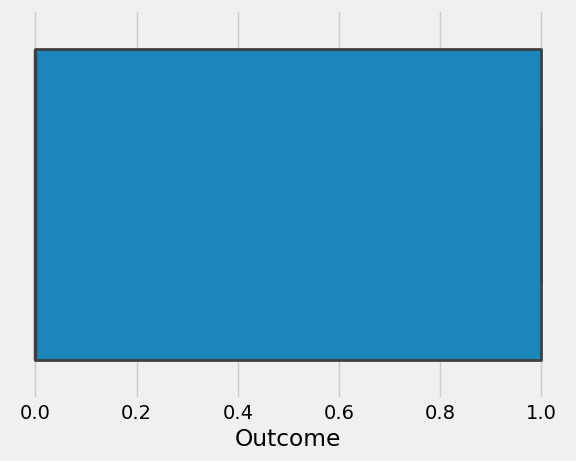

In [364]:
for i in df.select_dtypes(include="number").columns:
    sns.boxenplot(data=df,x=i)
    plt.show()

# Create Model

In [366]:
target="Outcome"

x=df.drop(target,axis=1)
y=df[target]

In [367]:
X_train,X_test,y_trian,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [368]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=1000)

In [369]:
columns=["LogisticRegression","SVC","RandomForestClassifier","GradientBoostingClassifier"]
result1=[]
result2=[]
result3=[]

LogisticRegression()
accuracy is:  0.7395833333333334
Recall is:  0.723404255319149
F1 is:  0.576271186440678


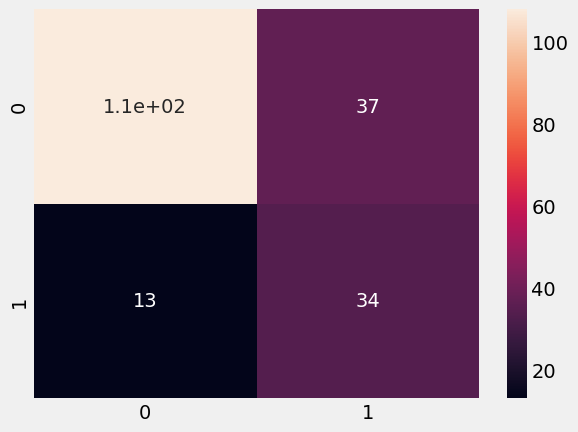

In [370]:
#LogisticRegression
def cal(model):
    model.fit(X_train,y_trian)
    y_pred=model.predict(X_test)
    #shof ad ehh sa7 altwk3
    acc=accuracy_score(y_pred,y_test)
    # kym alpredict 
    recall=recall_score(y_pred,y_test)
    # kan mabyn altwk3 bt3o w test
    f1=f1_score(y_pred,y_test)

    result1.append(acc)
    result2.append(recall)
    result3.append(f1)
    
    #+ve,-ve,true,and false
    confusion_matrix(y_pred,y_test)
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
    print(model)
    print("accuracy is: ",acc)
    print("Recall is: ",recall)
    print("F1 is: ",f1)
cal(model1)

SVC()
accuracy is:  0.703125
Recall is:  0.6944444444444444
F1 is:  0.4672897196261682


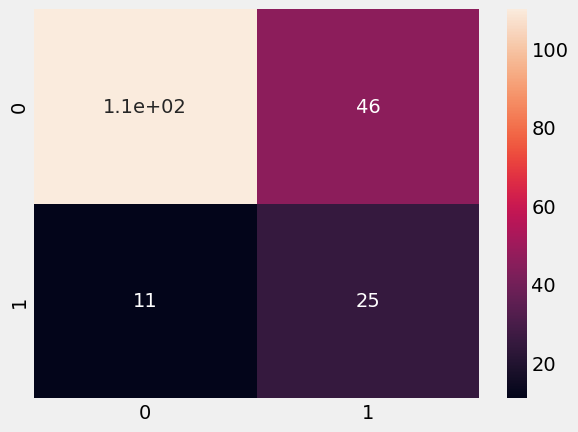

In [371]:
#SVC
cal(model2)

RandomForestClassifier()
accuracy is:  0.7447916666666666
Recall is:  0.72
F1 is:  0.5950413223140496


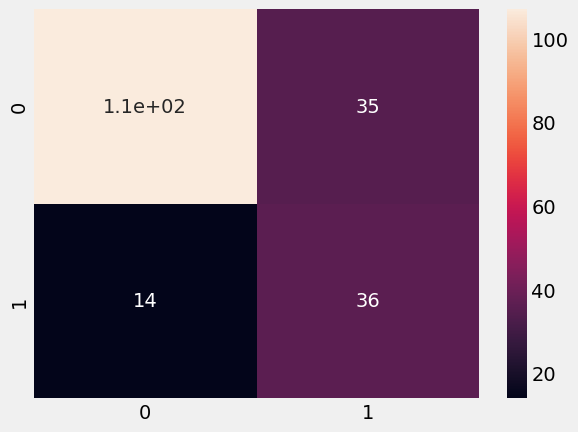

In [372]:
#RandomForestClassifier
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is:  0.6979166666666666
Recall is:  0.5970149253731343
F1 is:  0.5797101449275363


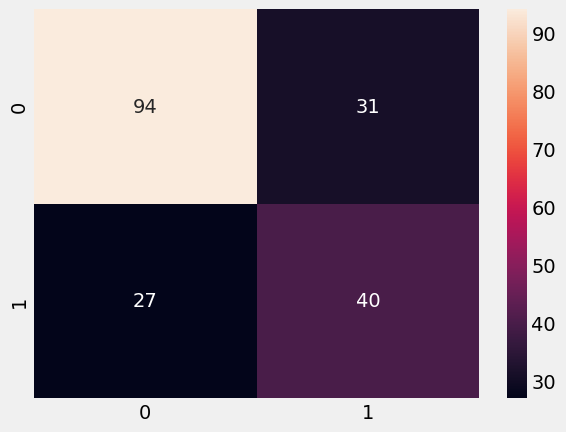

In [373]:
#GradientBoostingClassifier
cal(model4)

In [374]:
result1

[0.7395833333333334, 0.703125, 0.7447916666666666, 0.6979166666666666]

In [375]:
result2

[0.723404255319149, 0.6944444444444444, 0.72, 0.5970149253731343]

In [376]:
result3

[0.576271186440678, 0.4672897196261682, 0.5950413223140496, 0.5797101449275363]

In [405]:
final_result=pd.DataFrame({'Algorithm':columns,'Accuracies':result1,'Recall':result2,'Fscore':result3})

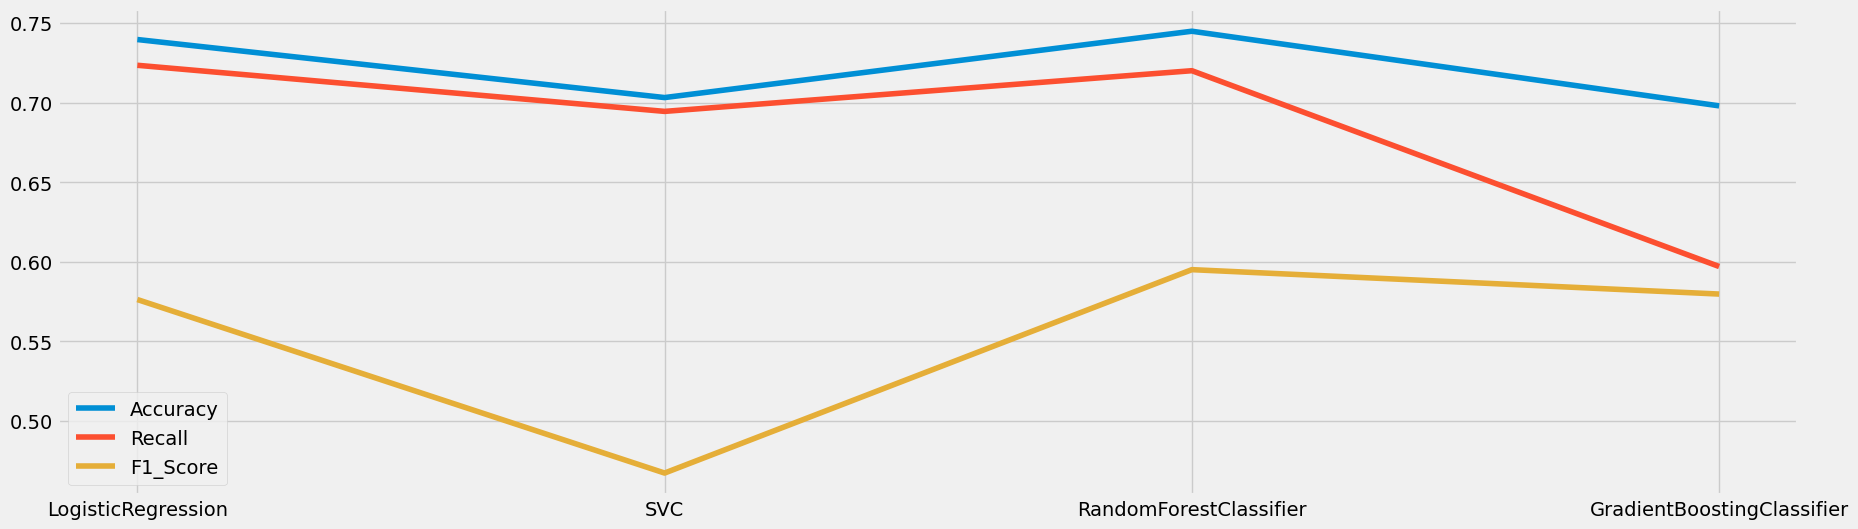

In [427]:
fig,ax=plt.subplots(figsize=(20,6))
plt.plot(final_result.Algorithm,result1,label="Accuracy")
plt.plot(final_result.Algorithm,result2,label="Recall")
plt.plot(final_result.Algorithm,result3,label="F1_Score")
plt.legend()
plt.show()

In [439]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       121
           1       0.72      0.48      0.58        71

    accuracy                           0.74       192
   macro avg       0.73      0.69      0.69       192
weighted avg       0.74      0.74      0.72       192

